done
calculate_dimensions {'Master Bedroom': {'width': 9.25, 'height': 9.73}, 'Common Washroom': {'width': 3.39, 'height': 6.64}, 'Passage': {'width': 3.39, 'height': 3.09}, 'Kitchen': {'width': 5.88, 'height': 12.24}, 'Living Room': {'width': 8.58, 'height': 12.24}}
calculate_area_percentages {'Master Bedroom': {'width': 9.25, 'height': 9.73, 'area': 90.0, 'percentage': 30.0}, 'Common Washroom': {'width': 3.39, 'height': 6.64, 'area': 22.51, 'percentage': 7.5}, 'Passage': {'width': 3.39, 'height': 3.09, 'area': 10.48, 'percentage': 3.49}, 'Kitchen': {'width': 5.88, 'height': 12.24, 'area': 71.97, 'percentage': 23.99}, 'Living Room': {'width': 8.58, 'height': 12.24, 'area': 105.02, 'percentage': 35.01}}
metadata {'Master Bedroom': {1: {'wall_length': 11.32, 'wall_type': 'horizontal', 'coordinates': [[14.62, 63.23], [25.94, 63.23]], 'room_area': 133.92, 'parallel_walls': [1, 3], 'is_free': True, 'direction': 'North'}, 2: {'wall_length': 11.83, 'wall_type': 'vertical', 'coordinates': [[2

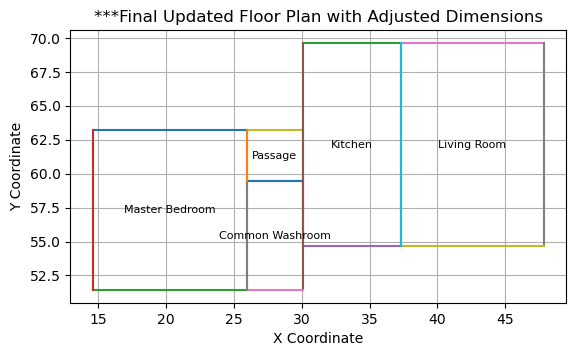

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy

# Updated dictionary with only minimum dimensions specified except for specific rooms
constraints = {
    'Master Bedroom': {'min_width':6.89, 'min_height':6.89},
    'Kitchen': {'min_width': 5.91, 'min_height': 5.91},
    'Living Room': {'min_width': 6.89, 'min_height': 6.89},
    'Bedroom': {'min_width': 6.89, 'min_height': 6.89},
    'Foyer': {'min_width': 3.3, 'min_height': 3.3},
    'Dining Room': {'min_width': 5, 'min_height': 5},
    'En suite Washroom': {'min_width': 3.3, 'min_height': 3.3},
    'Common Washroom': {'min_width': 3.3, 'min_height': 3.3},
    'Passage': {'min_width': 3.3 ,'min_height': 3.3},
    'Bathroom':{'min_width': 3.3, 'min_height': 3.3},
    'Washroom':{'min_width': 3.3, 'min_height': 3.3}
}
constraints1 = {
    'En suite Washroom': {'min_width': 3.3, 'max_width': 8, 'min_height': 3.3, 'max_height': 8},
    'Common Washroom': {'min_width': 3.3, 'max_width': 8, 'min_height': 3.3, 'max_height': 8},
    'Bathroom': {'min_width': 3.3, 'max_width': 8, 'min_height': 3.3, 'max_height': 5},
    'Washroom': {'min_width': 3.3, 'max_width': 8, 'min_height': 3.3, 'max_height': 5}
}
passage_constraints = {
    'Passage': {'min_width': 4,'max_width': 7, 'min_height': 4 ,'max_height': 7},
    'MB Passage': {'min_width': 4, 'min_height': 4}
}

# Function to calculate dimensions for each room
def calculate_dimensions(rooms):
    dimensions = {}
    for room, coordinates in rooms.items():
        width = round(abs(coordinates[0][0][0] - coordinates[0][1][0]), 2)
        height = round(abs(coordinates[0][0][1] - coordinates[2][0][1]), 2)
        dimensions[room] = {'width': width, 'height': height}
    return dimensions

# Function to calculate the area of each room and percentage of total area
def calculate_area_percentages(dimensions):
    total_area = sum([round(dim['width'] * dim['height'], 2) for dim in dimensions.values()])
    for room, dim in dimensions.items():
        area = round(dim['width'] * dim['height'], 2)
        dim['area'] = area
        dim['percentage'] = round((area / total_area) * 100, 2)  # Round percentage to 2 decimal places
    return dimensions

# Function to scale dimensions based on new total area
def scale_dimensions(dimensions, new_total_area):
    scale_factor = np.sqrt(new_total_area / sum([dim['area'] for dim in dimensions.values()]))
    for room, dim in dimensions.items():
        dim['scaled_width'] = round(dim['width'] * scale_factor, 2)
        dim['scaled_height'] = round(dim['height'] * scale_factor, 2)
        dim['scaled_area'] = round(dim['scaled_width'] * dim['scaled_height'], 2)
    return dimensions

# Function to recalculate room coordinates based on scaled dimensions, maintaining original connections
def recalculate_coordinates(rooms, dimensions):
    new_rooms = {}
    for room, coordinates in rooms.items():
        scaled_width = dimensions[room]['scaled_width']
        scaled_height = dimensions[room]['scaled_height']
        x_scale = scaled_width / dimensions[room]['width']
        y_scale = scaled_height / dimensions[room]['height']
        new_coordinates = []
        for coord in coordinates:
            x1, y1 = coord[0]
            x2, y2 = coord[1]
            x1_new = round(x1 * x_scale, 2)
            y1_new = round(y1 * y_scale, 2)
            x2_new = round(x2 * x_scale, 2)
            y2_new = round(y2 * y_scale, 2)
            new_coordinates.append([[x1_new, y1_new], [x2_new, y2_new]])
        new_rooms[room] = new_coordinates
    return new_rooms

# Function to plot the new floor plan
def plot_floor_plan(rooms, title='Scaled Floor Plan'):
    fig, ax = plt.subplots()
    for room, coordinates in rooms.items():
        for line in coordinates:
            (x1, y1), (x2, y2) = line
            ax.plot([x1, x2], [y1, y2])
        # Add room label
        centroid_x = sum([line[0][0] for line in coordinates]) / 4
        centroid_y = sum([line[0][1] for line in coordinates]) / 4
        ax.text(centroid_x, centroid_y, room, ha='center', va='center', fontsize=8)
    ax.set_aspect('equal')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title)
    plt.grid(True)
    plt.show()

def round_room_coordinates(rooms):
    rounded_rooms = {}
    for room, coordinates in rooms.items():
        rounded_coordinates = []
        for line in coordinates:
            rounded_line = []
            for point in line:
                x, y = point
                rounded_x = round(x, 2)
                rounded_y = round(y, 2)
                rounded_line.append([rounded_x, rounded_y])
            rounded_coordinates.append(rounded_line)
        rounded_rooms[room] = rounded_coordinates
    return rounded_rooms

# Helper functions
def calculate_wall_length(start, end):
    return round(((end[0] - start[0])**2 + (end[1] - start[1])**2)**0.5, 2)

def determine_wall_type(start, end):
    if start[0] == end[0]:
        return 'vertical'
    elif start[1] == end[1]:
        return 'horizontal'
    else:
        return 'diagonal'

def calculate_area(coordinates):
    x_coords = [point[0] for point in coordinates]
    y_coords = [point[1] for point in coordinates]
    return round(0.5 * abs(sum(x * y for x, y in zip(x_coords, y_coords[1:] + y_coords[:1])) - sum(y * x for x, y in zip(x_coords[1:] + x_coords[:1], y_coords))), 2)

# Function to check for overlaps between wall segments
def check_overlap(w1, w2):
    # Sort the points to simplify the logic
    w1 = sorted(w1)
    w2 = sorted(w2)

    # Check for vertical overlap
    if w1[0][0] == w1[1][0] == w2[0][0] == w2[1][0]:  # All x are the same
        return not (w1[1][1] <= w2[0][1] or w2[1][1] <= w1[0][1])
    # Check for horizontal overlap
    elif w1[0][1] == w1[1][1] == w2[0][1] == w2[1][1]:  # All y are the same
        return not (w1[1][0] <= w2[0][0] or w2[1][0] <= w1[0][0])
    return False

def is_overlapping_or_touching(line1, line2):
    (x1_start, y1_start), (x1_end, y1_end) = line1
    (x2_start, y2_start), (x2_end, y2_end) = line2

    if x1_start == x1_end == x2_start == x2_end:  # Vertical lines
        return max(min(y1_start, y1_end), min(y2_start, y2_end)) < min(max(y1_start, y1_end), max(y2_start, y2_end))
    elif y1_start == y1_end == y2_start == y2_end:  # Horizontal lines
        return max(min(x1_start, x1_end), min(x2_start, x2_end)) < min(max(x1_start, x1_end), max(x2_start, x2_end))
    return False

def is_wall_free(coords, room_name, rooms):
    for other_room, walls in rooms.items():
        if other_room != room_name:
            for wall in walls:
                if check_overlap(coords, wall):
                    return False
    return True

def get_direction(start, end, room_min_x, room_max_x, room_min_y, room_max_y):
    if start[1] == end[1]:  # Horizontal line
        if start[1] == room_max_y:
            return 'North'
        elif start[1] == room_min_y:
            return 'South'
    elif start[0] == end[0]:  # Vertical line
        if start[0] == room_min_x:
            return 'West'
        elif start[0] == room_max_x:
            return 'East'
    return 'Unknown'

def make_roomdata(rooms):
    metadata = {}
    total_area = 0
    wall_counter = 1  # Unique identifier for each wall across all rooms

    for room, walls in rooms.items():
        room_area = round(calculate_area([wall[0] for wall in walls]), 2)
        total_area += room_area
        wall_numbers = {'horizontal': [], 'vertical': []}  # Separate wall numbers by type

        for wall in walls:
            start, end = copy.deepcopy(wall)
            length = calculate_wall_length(start, end)
            wall_type = determine_wall_type(start, end)
            wall_numbers[wall_type].append(wall_counter)

            room_min_x = min(min(wall[0][0], wall[1][0]) for wall in walls)
            room_max_x = max(max(wall[0][0], wall[1][0]) for wall in walls)
            room_min_y = min(min(wall[0][1], wall[1][1]) for wall in walls)
            room_max_y = max(max(wall[0][1], wall[1][1]) for wall in walls)
            direction = get_direction(start, end, room_min_x, room_max_x, room_min_y, room_max_y)
            metadata.setdefault(room, {})[wall_counter] = {
                'wall_length': length,
                'wall_type': wall_type,
                'coordinates': [start, end],
                'room_area': room_area,
                'parallel_walls': [],
                'is_free': is_wall_free([start, end], room, rooms),
                'direction': direction
            }
            wall_counter += 1

        # Assign parallel wall numbers within each wall type
        for wall_type in ['horizontal', 'vertical']:
            numbers = wall_numbers[wall_type]
            for number in numbers:
                metadata[room][number]['parallel_walls'] = numbers

    return metadata

def calculate_total_area(metadata):
    total_area = 0
    for room_data in metadata.values():
        for wall_data in room_data.values():
            # Add the area of each room once to the total
            total_area += wall_data['room_area']
            break  # Break after the first wall to avoid multiple additions of the same room area
    return total_area

def is_direction_free(room, direction, metadata):
    for wall_id, data in metadata[room].items():
        if metadata[room][wall_id]['direction'] == direction:
            if metadata[room][wall_id]['is_free'] == True:
                return True
    return False

def shift_room(room, direction, delta, metadata, main_room):
    if main_room == 'En suite Washroom':
        related_rooms = ['Master Bedroom', 'MB Passage']
    elif main_room=='MB Passage':
        related_rooms = ['Master Bedroom', 'En suite Washroom']
    else:
        if room == 'Master Bedroom' and 'En suite Washroom' and 'MB Passage' in metadata:
            related_rooms = ['Master Bedroom', 'MB Passage', 'En suite Washroom']
        elif room == 'Master Bedroom' and 'En suite Washroom' in metadata:
            related_rooms = ['Master Bedroom', 'En suite Washroom']
        elif room == 'Master Bedroom' and 'MB Passage' in metadata:
            related_rooms = ['Master Bedroom', 'MB Passage']
        else:
            related_rooms = [room]
    
    for related_room in related_rooms:
        for wall_id, data in metadata[related_room].items():
            start, end = data['coordinates']
            if direction == 'North':
                start[1] = round(start[1] + delta, 2)
                end[1] = round(end[1] + delta, 2)
            elif direction == 'South':
                start[1] = round(start[1] - delta, 2)
                end[1] = round(end[1] - delta, 2)
            elif direction == 'East':
                start[0] = round(start[0] + delta, 2)
                end[0] = round(end[0] + delta, 2)
            elif direction == 'West':
                start[0] = round(start[0] - delta, 2)
                end[0] = round(end[0] - delta, 2)
            metadata[related_room][wall_id]['coordinates'] = (start.copy(), end.copy())
            metadata[related_room][wall_id]['wall_length'] = calculate_wall_length(start, end)


def find_adjacent_rooms(room_name, rooms):
    
    adjacent_rooms = {'North': [], 'South': [], 'East': [], 'West': []}

    # Retrieve walls of the specified room
    target_room_walls = rooms[room_name]

    # Iterate over each wall in the target room
    for target_wall in target_room_walls:
        t_x1, t_y1 = target_wall[0]
        t_x2, t_y2 = target_wall[1]

        for other_room, other_walls in rooms.items():
            if other_room == room_name:
                continue  # Skip the same room

            for other_wall in other_walls:
                o_x1, o_y1 = other_wall[0]
                o_x2, o_y2 = other_wall[1]

                # Check for overlapping or touching lines
                if is_overlapping_or_touching([target_wall[0], target_wall[1]], [other_wall[0], other_wall[1]]):
                    # Determine direction based on position relative to target room
                    if t_x1 == t_x2 == o_x1 == o_x2:  # Vertical alignment
                        if t_y1 < t_y2:
                            adjacent_rooms['West'].append(other_room)
                        else:
                            adjacent_rooms['East'].append(other_room)
                    elif t_y1 == t_y2 == o_y1 == o_y2:  # Horizontal alignment
                        if t_x1 < t_x2:
                            adjacent_rooms['North'].append(other_room)
                        else:
                            adjacent_rooms['South'].append(other_room)

    # Remove duplicates and clean up the data
    for direction in adjacent_rooms:
        adjacent_rooms[direction] = list(set(adjacent_rooms[direction]))

    return adjacent_rooms

def round_metadata_coordinates(metadata):
    for room, walls in metadata.items():
        for wall_id, wall_data in walls.items():
            start, end = wall_data['coordinates']
            # Round the start and end coordinates
            rounded_start = [round(start[0], 2), round(start[1], 2)]
            rounded_end = [round(end[0], 2), round(end[1], 2)]
            # Update the coordinates in the metadata
            wall_data['coordinates'] = (rounded_start, rounded_end)

def update_wall_length_by_dimension(room, dimension, new_length, metadata):
    wall_type = 'vertical' if dimension == 'height' else 'horizontal'
    possible_directions = ['North', 'South'] if wall_type == 'vertical' else ['East', 'West']
    wall_numbers_to_update = [wall_number for wall_number, data in metadata[room].items() if data['wall_type'] == wall_type]

    for wall_number in wall_numbers_to_update:
        target_walls = [wall_id for wall_id in metadata[room] if wall_id == wall_number or wall_number in metadata[room][wall_id]['parallel_walls']]

        for wall_id in target_walls:
            data = metadata[room][wall_id]
            start, end = data['coordinates']
            original_start, original_end = start.copy(), end.copy()  # Save original coordinates
            current_length = calculate_wall_length(start, end)
            delta = new_length - current_length

    direction_to_use = None
    # Determine available direction or shift adjacent rooms if needed
    direction_to_use = None

    for direction in possible_directions:
        if is_direction_free(room, direction, metadata):
            direction_to_use = direction
            break

    if direction_to_use is None:
        adjacent_rooms = find_adjacent_rooms(room, rooms)
        for direction in possible_directions:
        # Check if all adjacent rooms in this direction are free
            if all(is_direction_free(adj_room, direction, metadata) for adj_room in adjacent_rooms[direction]):
                direction_to_use = direction
                # Shift all adjacent rooms because they are all free
                for adj_room in adjacent_rooms[direction]:
                    shift_room(adj_room, direction, delta, metadata,room)
                break
    if direction_to_use is None:
        print(f"No free directions available for updating {dimension} in {room}.")
        return

    for wall_number in wall_numbers_to_update:
        target_walls = [wall_id for wall_id in metadata[room] if wall_id == wall_number or wall_number in metadata[room][wall_id]['parallel_walls']]

        for wall_id in target_walls:
            data = metadata[room][wall_id]
            start, end = data['coordinates']
            original_start, original_end = start.copy(), end.copy()  # Save original coordinates
            current_length = calculate_wall_length(start, end)
            delta = new_length - current_length

            if direction_to_use == 'North':
                if start[1] > end[1]:
                    start[1] = round(start[1] + delta, 2)
                else:
                    end[1] = round(end[1] + delta, 2)
            elif direction_to_use == 'South':
                if start[1] < end[1]:
                    start[1] = round(start[1] - delta, 2)
                else:
                    end[1] = round(end[1] - delta, 2)
            elif direction_to_use == 'East':
                if start[0] < end[0]:
                    end[0] = round(end[0] + delta, 2)
                else:
                    start[0] = round(start[0] + delta, 2)
            elif direction_to_use == 'West':
                if start[0] < end[0]:
                    start[0] = round(start[0] - delta, 2)
                else:
                    end[0] = round(end[0] - delta, 2)

            metadata[room][wall_id]['coordinates'] = (start.copy(), end.copy())
            metadata[room][wall_id]['wall_length'] = calculate_wall_length(start, end)

            # Check for adjacent walls sharing the updated coordinates within the same room
            for wall_id2, data2 in metadata[room].items():
                if wall_id2 != wall_id:
                    s, e = data2['coordinates']
                    if s == original_start:
                        s[:] = start
                    elif s == original_end:
                        s[:] = end
                    elif e == original_start:
                        e[:] = start
                    elif e == original_end:
                        e[:] = end
                    metadata[room][wall_id2]['coordinates'] = (s.copy(), e.copy())
                    metadata[room][wall_id2]['wall_length'] = calculate_wall_length(s, e)

def create_connection_matrix(rooms):
    connection_matrix = {}
    for room1, coords1 in rooms.items():
        connection_matrix[room1] = []
        for room2, coords2 in rooms.items():
            if room1 != room2:
                connected = False
                for c1 in coords1:
                    for c2 in coords2:
                        if (
                            # Check horizontal overlap
                            (min(c1[0][1], c1[1][1]) <= max(c2[0][1], c2[1][1]) <= max(c1[0][1], c1[1][1]) or
                             min(c2[0][1], c2[1][1]) <= max(c1[0][1], c1[1][1]) <= max(c2[0][1], c2[1][1])) and
                            # Check vertical overlap
                            (min(c1[0][0], c1[1][0]) <= max(c2[0][0], c2[1][0]) <= max(c1[0][0], c1[1][0]) or
                             min(c2[0][0], c2[1][0]) <= max(c1[0][0], c1[1][0]) <= max(c2[0][0], c2[1][0]))
                        ):
                            connected = True
                            break
                    if connected:
                        connection_matrix[room1].append(room2)
                        break
    return connection_matrix

def flatten_to_array(coordinates):
    return np.array([coord for pair in coordinates for coord in pair]).reshape(-1, 2)

# Function to calculate centroid
def calculate_centroid(coords):
    x_coords = [point[0] for coord in coords for point in coord]
    y_coords = [point[1] for coord in coords for point in coord]
    return np.mean(x_coords), np.mean(y_coords)

def get_max_axis_shift(old_coords, new_coords, direction):
    old_array = flatten_to_array(old_coords)
    new_array = flatten_to_array(new_coords)
    shifts = new_array - old_array

    if 'East' in direction or 'West' in direction:
        shift_lengths = shifts[:, 0]  # Keep the signed differences in x-axis
    else:
        shift_lengths = shifts[:, 1]  # Keep the signed differences in y-axis

    max_shift_length = np.max(shift_lengths) if np.max(shift_lengths) >= abs(np.min(shift_lengths)) else np.min(shift_lengths)
    return max_shift_length

def get_shift_details(original_coords, updated_coords):
    original_centroid = calculate_centroid(original_coords)
    updated_centroid = calculate_centroid(updated_coords)
    shift_vector = np.array(updated_centroid) - np.array(original_centroid)
    direction = ''
    
    if shift_vector[0] > 0:
        direction += 'East'
    elif shift_vector[0] < 0:
        direction += 'West'
    
    if shift_vector[1] > 0:
        direction += 'North'
    elif shift_vector[1] < 0:
        direction += 'South'
    
    shift_length = np.linalg.norm(shift_vector)
    return direction, round(shift_length, 2)

def calculate_dimensions_from_metadata(room_data):
    x_coords = []
    y_coords = []
    for wall_id, wall in room_data.items():
        coords = wall.get('coordinates', [])
        for coord in coords:
            x_coords.append(coord[0])
            y_coords.append(coord[1])

    width = max(x_coords) - min(x_coords) if x_coords else 0
    height = max(y_coords) - min(y_coords) if y_coords else 0
    return width, height

def update_wall_length_by_dimension2(room, direction, delta, updated_walls, metadata):
    room_data = metadata.get(room, {})
    current_width, current_height = calculate_dimensions_from_metadata(room_data)
    
    print(f"Current dimensions for {room} - Width: {current_width}, Height: {current_height}")

    # Get the constraints for the room if it's specifically limited.
    if room in ['En suite Washroom', 'Common Washroom','Bathroom','Washroom']:
        max_width = constraints1[room]['max_width']
        max_height = constraints1[room]['max_height']
        print(current_height + abs(delta))
        # Depending on the direction, check if the update exceeds maximum dimensions.
        if direction in ['North', 'South']:
            if current_height + abs(delta) > max_height:
                print(f"Adjustment for {room} exceeds max height {max_height}. Adjustment not applied.")
                return
        elif direction in ['East', 'West']:
            if current_width + abs(delta) > max_width:
                print(f"Adjustment for {room} exceeds max width {max_width}. Adjustment not applied.")
                return

    wall_type = 'vertical' if direction in ['North', 'South'] else 'horizontal'
    wall_numbers_to_update = [wall_number for wall_number, data in metadata[room].items() if data['wall_type'] == wall_type]

    for wall_number in wall_numbers_to_update:
        for wall_id in metadata[room]:
            if (wall_id == wall_number or wall_number in metadata[room][wall_id]['parallel_walls']) and wall_id not in updated_walls:
                updated_walls.add(wall_id)
                data = metadata[room][wall_id]
                start, end = data['coordinates']
                original_start, original_end = start.copy(), end.copy()
                adjust_coordinates_by_direction(start, end, direction, delta)
                metadata[room][wall_id]['coordinates'] = (start.copy(), end.copy())
                metadata[room][wall_id]['wall_length'] = calculate_wall_length(start, end)
                update_adjacent_walls(metadata, room, wall_id, original_start, original_end, start, end)



def adjust_coordinates_by_direction(start, end, direction, delta):
    if direction in ['North', 'South']:
        index = 1  # Working on the y-axis
        positive = (direction == 'North')
    else:
        index = 0  # Working on the x-axis
        positive = (direction == 'East')
        
    if positive:
        if start[index] < end[index]:
            end[index] = round(end[index] + delta, 2)
        else:
            start[index] = round(start[index] + delta, 2)
    else:
        if start[index] > end[index]:
            end[index] = round(end[index] - delta, 2)
        else:
            start[index] = round(start[index] - delta, 2)

def update_adjacent_walls(metadata, room, wall_id, original_start, original_end, start, end):
    for wall_id2, data2 in metadata[room].items():
        if wall_id2 != wall_id:
            s, e = data2['coordinates']
            if (s == original_start or s == original_end or e == original_start or e == original_end) and not is_connected_to_other_room((s, e), metadata, room):
                if s == original_start:
                    s[:] = start
                elif s == original_end:
                    s[:] = end
                elif e == original_start:
                    e[:] = start
                elif e == original_end:
                    e[:] = end
                s = [round(coord, 2) for coord in s]
                e = [round(coord, 2) for coord in e]
                metadata[room][wall_id2]['coordinates'] = (s.copy(), e.copy())
                metadata[room][wall_id2]['wall_length'] = calculate_wall_length(s, e)

def is_connected_to_other_room(wall_coords, metadata, current_room):
    for room, room_data in metadata.items():
        if room != current_room:
            for wall_id, wall_data in room_data.items():
                if wall_coords in [(wall_data['coordinates'][0], wall_data['coordinates'][1]), (wall_data['coordinates'][1], wall_data['coordinates'][0])]:
                    print('True')
                    return True
    return False

def update_wall_length_by_dimension3(room, direction, delta, updated_walls, metadata):
    room_data = metadata.get(room, {})
    current_width, current_height = calculate_dimensions_from_metadata(room_data)

    wall_type = 'vertical' if direction in ['North', 'South'] else 'horizontal'
    wall_numbers_to_update = [wall_number for wall_number, data in metadata[room].items() if data['wall_type'] == wall_type]

    for wall_number in wall_numbers_to_update:
        for wall_id in metadata[room]:
            if (wall_id == wall_number or wall_number in metadata[room][wall_id]['parallel_walls']) and wall_id not in updated_walls:
                updated_walls.add(wall_id)
                data = metadata[room][wall_id]
                start, end = data['coordinates']
                original_start, original_end = start.copy(), end.copy()
                adjust_coordinates_by_direction(start, end, direction, delta)
                metadata[room][wall_id]['coordinates'] = (start.copy(), end.copy())
                metadata[room][wall_id]['wall_length'] = calculate_wall_length(start, end)
                update_adjacent_walls(metadata, room, wall_id, original_start, original_end, start, end)


def is_direction_free(room, direction, metadata):
    for wall_number, data in metadata[room].items():
        if data['direction'] == direction:
            # Assuming we have a way to check if the wall is free, such as an attribute 'is_free'
            if not data.get('is_free', True):
                return False
    return True

def opposite_direction(direction):
    opposites = {'North': 'South', 'South': 'North', 'East': 'West', 'West': 'East'}
    return opposites[direction]

def update_shifts_based_on_wall_availability(unshifted_room, shifted_room, direction, length, updated_walls, metadata, overlap):
    print(f"Processing shift for rooms: Unshifted - {unshifted_room}, Shifted - {shifted_room}, Direction - {direction}, Length - {length}")
    print('direction is',direction)
    print(overlap)
    if overlap == True:
        print('innnn1111111122344556')
        update_wall_length_by_dimension3(shifted_room, direction, -(length), updated_walls, metadata)
    else:
        print('enter in Flase further')
        print(unshifted_room)
        print(direction)
        # First, try to update the unshifted room if the direction is free
        if is_direction_free(unshifted_room, direction, metadata):
            
            update_wall_length_by_dimension2(unshifted_room, direction, length, updated_walls, metadata)
        else:
            # If not free, check the shifted room in the opposite direction
            opp_direction = opposite_direction(direction)
            print(opp_direction)
            if is_direction_free(shifted_room, opp_direction, metadata):
                # If the opposite direction is free in the shifted room
                update_wall_length_by_dimension2(shifted_room, opp_direction, length, updated_walls, metadata)
            else:
                print(f"No available directions to shift walls for room pair ({unshifted_room}, {shifted_room})")

# def make_shift_analysis_dict(broken_connections, updated_rooms, rooms):
#     # Loop through each pair of rooms in the shift_analysis_dict
#     shift_analysis_dict = {}
#     for room_pair in broken_connections:
#         room1, room2 = room_pair  # Correctly unpack room identifiers from the nested tuple

#         # Assuming 'rooms' and 'updated_rooms' are dictionaries with room names as keys
#         if room1 in rooms and room1 in updated_rooms and room2 in rooms and room2 in updated_rooms:
#             direction1, length1 = get_shift_details(rooms[room1], updated_rooms[room1])
#             direction2, length2 = get_shift_details(rooms[room2], updated_rooms[room2])
#             shift_analysis_dict[(room1, room2)] = {
#                 'Unshifted Room': room2 if direction1 != 'None' and direction2 == 'None' else room1 if direction2 != 'None' and direction1 == 'None' else 'None or Both',
#                 'Shifted': {
#                     room1: {'Direction': direction1, 'Length': f"{length1:.2f} units"} if direction1 != 'None' else None,
#                     room2: {'Direction': direction2, 'Length': f"{length2:.2f} units"} if direction2 != 'None' else None,
#                 }
#             }
#         else:
#             print(f"Missing data for {room1} or {room2}")
#     return shift_analysis_dict


def stichFloorplan(shift_analysis_dict, metadata, overlap):
    updated_walls = set()
    # Loop through each pair of rooms in the shift_analysis_dict
    for room_pair, shift_details in shift_analysis_dict.items():
        unshifted_room = shift_details['Unshifted Room']
        shifted_dict = shift_details['Shifted']
        # Determine shifted room dynamically
        for room, details in shifted_dict.items():
            if details:  # Ensuring that there is a shift specified for the room
                direction = details['Direction']
                length = float(details['Length'].split(' ')[0])  # Assumes '3.85 units' and extracts the float part
                shifted_room = room
                if overlap == False:
                    # Update walls based on the availability and requirements
                    update_shifts_based_on_wall_availability(unshifted_room, shifted_room, direction, length, updated_walls, metadata, overlap)
                else:
                    update_shifts_based_on_wall_availability(unshifted_room, shifted_room, direction, length, updated_walls, metadata, overlap)

    updated_rooms = {room: [data['coordinates'] for wall_id, data in walls.items()] for room, walls in metadata.items()}
    return updated_rooms

def validate_room_dimensions(metadata, constraints):
    validation_messages = []
    for room, room_data in metadata.items():
        width, height = calculate_dimensions_from_metadata(room_data)
        
        # Fetch constraints for each room, handling rooms with max dimensions separately
        min_width = constraints.get(room, {}).get('min_width', 0)
        min_height = constraints.get(room, {}).get('min_height', 0)
        max_width = constraints.get(room, {}).get('max_width', float('inf'))
        max_height = constraints.get(room, {}).get('max_height', float('inf'))
        
        if not (min_width <= width <= max_width):
            validation_messages.append(f"{room}: Width {width:.2f} is out of bounds ({min_width}-{max_width}).")
        if not (min_height <= height <= max_height):
            validation_messages.append(f"{room}: Height {height:.2f} is out of bounds ({min_height}-{max_height}).")

    return validation_messages

def adjust_room_dimensions_to_meet_constraints(metadata, constraints, fixed_room_dimensions, updated_rooms):
    # Rooms to skip
    excluded_rooms = {'MB Passage'}

    adjusted_rooms = set()
    for room, data in metadata.items():

        if room not in fixed_room_dimensions and room not in adjusted_rooms and room not in excluded_rooms:
            # Retrieve the current dimensions from metadata
            current_width, current_height = calculate_dimensions_from_metadata(data)
            # Retrieve constraints for the room
            min_width = constraints[room]['min_width']
            min_height = constraints[room]['min_height']
            
            # Determine how much to adjust dimensions
            width_delta = max(0, min_width - current_width)
            height_delta = max(0, min_height - current_height)
            
            # Update dimensions if adjustments are needed
            if width_delta > 0:
                dimension = 'width'
                new_length = width_delta + current_width
                adjust_dimension(room, dimension, new_length, metadata, updated_rooms)
            if height_delta > 0:
                dimension = 'height'
                new_length = height_delta + current_height
                adjust_dimension(room, dimension, new_length, metadata, updated_rooms)

def adjust_dimension(room, dimension, new_length, metadata, rooms):
    print(f"Adjusting {dimension} for {room}")

    wall_type = 'vertical' if dimension == 'height' else 'horizontal'
    possible_directions = ['North', 'South'] if wall_type == 'vertical' else ['East', 'West']
    wall_numbers_to_update = [wall_number for wall_number, data in metadata[room].items() if data['wall_type'] == wall_type]

    for wall_number in wall_numbers_to_update:
        target_walls = [wall_id for wall_id in metadata[room] if wall_id == wall_number or wall_number in metadata[room][wall_id]['parallel_walls']]

        for wall_id in target_walls:
            data = metadata[room][wall_id]
            start, end = data['coordinates']
            original_start, original_end = start.copy(), end.copy()  # Save original coordinates
            current_length = calculate_wall_length(start, end)
            delta = new_length - current_length

    direction_to_use = None

    # Determine available direction or shift adjacent rooms if needed
    for direction in possible_directions:
        if is_direction_free(room, direction, metadata):
            direction_to_use = direction
            break

    if direction_to_use is None:
        adjacent_rooms = find_adjacent_rooms(room, rooms)
        print(adjacent_rooms)
        for direction in possible_directions:
            if all(is_direction_free(adj_room, direction, metadata) for adj_room in adjacent_rooms[direction] if adj_room in metadata):
                direction_to_use = direction
                for adj_room in adjacent_rooms[direction]:
                    print(adj_room)
                    print(direction)
                    print(delta)
                    shift_room(adj_room, direction, delta, metadata, room)
                break

    if direction_to_use is None:
        # Check further adjustment rooms
        for direction in possible_directions:
            further_adjacent_rooms = {adj_room: find_adjacent_rooms(adj_room, rooms) for adj_room in adjacent_rooms[direction] if adj_room in metadata}

            if all(is_direction_free(further_adj_room, direction, metadata) for adj_room in adjacent_rooms[direction] if adj_room in further_adjacent_rooms for further_adj_room in further_adjacent_rooms[adj_room] if further_adj_room in metadata):
                direction_to_use = direction
                for adj_room in adjacent_rooms[direction]:
                    print(adj_room)
                    print(direction)
                    shift_room(adj_room, direction, delta, metadata, room)
                    for further_adj_room, directions in further_adjacent_rooms.items():
                        for adj_room1 in directions[direction]:
                            shift_room(adj_room1, direction, delta, metadata, adj_room)
                break

    if direction_to_use is None:
        print(f"No free directions available for updating {dimension} in {room}.")
        return

    for wall_number in wall_numbers_to_update:
        target_walls = [wall_id for wall_id in metadata[room] if wall_id == wall_number or wall_number in metadata[room][wall_id]['parallel_walls']]

        for wall_id in target_walls:
            data = metadata[room][wall_id]
            start, end = data['coordinates']
            original_start, original_end = start.copy(), end.copy()  # Save original coordinates
            current_length = calculate_wall_length(start, end)
            delta = new_length - current_length

            if direction_to_use == 'North':
                if start[1] > end[1]:
                    start[1] = round(start[1] + delta, 2)
                else:
                    end[1] = round(end[1] + delta, 2)
            elif direction_to_use == 'South':
                if start[1] < end[1]:
                    start[1] = round(start[1] - delta, 2)
                else:
                    end[1] = round(end[1] - delta, 2)
            elif direction_to_use == 'East':
                if start[0] < end[0]:
                    end[0] = round(end[0] + delta, 2)
                else:
                    start[0] = round(start[0] + delta, 2)
            elif direction_to_use == 'West':
                if start[0] < end[0]:
                    start[0] = round(start[0] - delta, 2)
                else:
                    end[0] = round(end[0] - delta, 2)

            metadata[room][wall_id]['coordinates'] = (start.copy(), end.copy())
            metadata[room][wall_id]['wall_length'] = calculate_wall_length(start, end)

            # Check for adjacent walls sharing the updated coordinates within the same room
            for wall_id2, data2 in metadata[room].items():
                if wall_id2 != wall_id:
                    s, e = data2['coordinates']
                    if s == original_start:
                        s[:] = start
                    elif s == original_end:
                        s[:] = end
                    elif e == original_start:
                        e[:] = start
                    elif e == original_end:
                        e[:] = end
                    s = [round(coord, 2) for coord in s]
                    e = [round(coord, 2) for coord in e]
                    metadata[room][wall_id2]['coordinates'] = (s.copy(), e.copy())
                    metadata[room][wall_id2]['wall_length'] = calculate_wall_length(s, e)

    # Round coordinates after adjustments
    round_coordinates_after_adjustments(metadata)
    
    # Update metadata for the whole floor plan after adjustments
    rooms.clear()
    for room in metadata:
        rooms[room] = [data['coordinates'] for wall_id, data in metadata[room].items()]



# Finally, round coordinates after adjustments
def round_coordinates_after_adjustments(metadata):
    for room, walls in metadata.items():
        for wall_id, wall_data in walls.items():
            start, end = wall_data['coordinates']
            rounded_start = [round(coord, 2) for coord in start]
            rounded_end = [round(coord, 2) for coord in end]
            wall_data['coordinates'] = (rounded_start, rounded_end)

def find_rooms_exceeding_min_constraints(metadata, constraints, fixed_room_dimensions):
    excluded_rooms = {'MB Passage', 'Passage','Common Washroom','En suite Washroom'}
    exceeding_rooms = {}
    
    for room, room_data in metadata.items():
        if room not in fixed_room_dimensions and room not in excluded_rooms:
            width, height = calculate_dimensions_from_metadata(room_data)
            min_width = constraints.get(room, {}).get('min_width', 0)
            min_height = constraints.get(room, {}).get('min_height', 0)
            
            if width > min_width or height > min_height:
                exceeding_rooms[room] = {
                    'exceeds_min_width_by': width - min_width if width > min_width else 0,
                    'exceeds_min_height_by': height - min_height if height > min_height else 0
                }
    
    return exceeding_rooms

def adjust_extra_area(metadata, constraints, fixed_room_dimensions, target_total_area):
    allowed_rooms = {'Master Bedroom', 'Living Room', 'Dining Room', 'Kitchen', 'Bedroom'}
    current_total_area = calculate_total_area(metadata)
    area_difference = target_total_area - current_total_area

    if area_difference == 0:
        print("Exact match; no adjustment needed.")
        return metadata

    priority_order = {'Living Room': 1, 'Dining Room': 2, 'Kitchen': 3, 'Bedroom': 4}
    adjustment_needed = []

    for room, data in sorted(metadata.items(), key=lambda item: priority_order.get(item[0], float('inf'))):
        if room in fixed_room_dimensions or room not in allowed_rooms or room not in constraints:
            continue
        
        width, height = calculate_dimensions_from_metadata(data)
        room_excess = {
            'width_excess': width - constraints[room].get('min_width', width),
            'height_excess': height - constraints[room].get('min_height', height)
        }

        if area_difference > 0:
            proportionate_width = width / (width + height) * area_difference
            proportionate_height = height / (width + height) * area_difference
            new_width = max(min(width + proportionate_width, constraints[room].get('max_width', float('inf'))), constraints[room]['min_width'])
            new_height = max(min(height + proportionate_height, constraints[room].get('max_height', float('inf'))), constraints[room]['min_height'])
            adjustment_needed.append({
                'room': room,
                'increase': True, 
                'width': width,
                'height': height,
                'adjust_width': new_width - width,
                'adjust_height': new_height - height
            })

        elif area_difference < 0 and (room_excess['width_excess'] > 0 or room_excess['height_excess'] > 0):
            width_decrease = min(abs(area_difference), room_excess['width_excess']) if room_excess['width_excess'] > 0 else 0
            height_decrease = min(abs(area_difference), room_excess['height_excess']) if room_excess['height_excess'] > 0 else 0

            new_width = max(width - width_decrease, constraints[room].get('min_width', width))
            new_height = max(height - height_decrease, constraints[room].get('min_height', height))
            
            width_decrease_adjusted = width - new_width
            height_decrease_adjusted = height - new_height

            adjustment_needed.append({
                'room': room,
                'increase': False, 
                'width': width, 
                'height': height, 
                'width_decrease': width_decrease_adjusted,
                'height_decrease': height_decrease_adjusted
            })

    total_adjustment = sum([abs(info['adjust_width'] * info['height'] + info['adjust_height'] * info['width'])
                            if info['increase'] else (info['width_decrease'] * info['height'] + info['height_decrease'] * info['width'])
                            for info in adjustment_needed])
    adjustment_factor = abs(area_difference) / total_adjustment if total_adjustment != 0 else 0

    for adjust_info in adjustment_needed:
        room = adjust_info['room']
        if adjust_info['increase']:
            adjust_width = adjust_info['adjust_width'] * adjustment_factor
            adjust_height = adjust_info['adjust_height'] * adjustment_factor
            new_width = max(adjust_info['width'] + adjust_width, constraints[room]['min_width'])
            new_height = max(adjust_info['height'] + adjust_height, constraints[room]['min_height'])
            
            width_updated = False
            height_updated = False
            
            # Check if direction for width is free
            if adjust_width > 0:
                for direction in ['East', 'West']:
                    if is_direction_free(room, direction, metadata):
                        update_wall_length_by_dimension(room, 'width', new_width, metadata)
                        width_updated = True
                        area_difference -= (adjust_width * adjust_info['height'])
                        break

            # Check if direction for height is free
            if adjust_height > 0:
                for direction in ['North', 'South']:
                    if is_direction_free(room, direction, metadata):
                        update_wall_length_by_dimension(room, 'height', new_height, metadata)
                        height_updated = True
                        area_difference -= (adjust_height * adjust_info['width'])
                        break

            if not width_updated:
                area_difference += adjust_width * adjust_info['height']
            if not height_updated:
                area_difference += adjust_height * adjust_info['width']

        else:
            width_decrease = adjust_info['width_decrease']
            height_decrease = adjust_info['height_decrease']
            width_decrease_adjusted = width_decrease * adjustment_factor
            height_decrease_adjusted = height_decrease * adjustment_factor
            new_width = max(adjust_info['width'] - width_decrease_adjusted, constraints[room]['min_width'])
            new_height = max(adjust_info['height'] - height_decrease_adjusted, constraints[room]['min_height'])

            if new_width < constraints[room]['min_width']:
                width_decrease_adjusted = width_decrease
                new_width = constraints[room]['min_width']

            if new_height < constraints[room]['min_height']:
                height_decrease_adjusted = height_decrease
                new_height = constraints[room]['min_height']
                
            width_updated = False
            height_updated = False
            
            # Check if direction for width is free
            if width_decrease > 0:
                for direction in ['East', 'West']:
                    if is_direction_free(room, direction, metadata):
                        update_wall_length_by_dimension(room, 'width', new_width, metadata)
                        width_updated = True
                        area_difference += (width_decrease_adjusted * adjust_info['height'])
                        break

            # Check if direction for height is free
            if height_decrease > 0:
                for direction in ['North', 'South']:
                    if is_direction_free(room, direction, metadata):
                        update_wall_length_by_dimension(room, 'height', new_height, metadata)
                        height_updated = True
                        area_difference += (height_decrease_adjusted * adjust_info['width'])
                        break

            if not width_updated:
                area_difference -= width_decrease_adjusted * adjust_info['height']
            if not height_updated:
                area_difference -= height_decrease_adjusted * adjust_info['width']

    # Check if area difference remains after adjustments


    return metadata




# Function to adjust all coordinates
def adjust_coordinates(rooms, threshold=0.2):
    # Flatten all coordinates and store original room and coordinate pair locations
    all_coords = []
    for room, shapes in rooms.items():
        for shape in shapes:
            for coord in shape:
                all_coords.append((coord, room, shape, coord))

    # Compare each coordinate with every other to find and adjust near matches
    n = len(all_coords)
    for i in range(n):
        for j in range(i + 1, n):
            coord1, room1, shape1, sub_coord1 = all_coords[i]
            coord2, room2, shape2, sub_coord2 = all_coords[j]
            # Check for closeness in both dimensions
            if abs(coord1[0] - coord2[0]) < threshold:
                new_x = round((coord1[0] + coord2[0]) / 2, 2)
                sub_coord1[0] = new_x
                sub_coord2[0] = new_x
            if abs(coord1[1] - coord2[1]) < threshold:
                new_y = round((coord1[1] + coord2[1]) / 2, 2)
                sub_coord1[1] = new_y
                sub_coord2[1] = new_y

    return rooms

def is_overlapping_or_touching1(line1, line2):
    (x1_start, y1_start), (x1_end, y1_end) = line1
    (x2_start, y2_start), (x2_end, y2_end) = line2

    if x1_start == x1_end == x2_start == x2_end:  # Vertical lines
        if max(min(y1_start, y1_end), min(y2_start, y2_end)) < min(max(y1_start, y1_end), max(y2_start, y2_end)):
            return True
    elif y1_start == y1_end == y2_start == y2_end:  # Horizontal lines
        if max(min(x1_start, x1_end), min(x2_start, x2_end)) < min(max(x1_start, x1_end), max(x2_start, x2_end)):
            return True
    return False

def get_room_lines(room_name, room_data):
    return room_data.get(room_name, [])

# Function to find common walls between all room pairs and display them
def find_and_display_common_walls(room_data):
    common_walls_info = {}
    room_names = list(room_data.keys())

    for i in range(len(room_names)):
        for j in range(i + 1, len(room_names)):
            room1, room2 = room_names[i], room_names[j]
            room1_lines = get_room_lines(room1, room_data)
            room2_lines = get_room_lines(room2, room_data)
            common_walls = []

            for line1 in room1_lines:
                for line2 in room2_lines:
                    if is_overlapping_or_touching1(line1, line2):
                        common_walls.append((line1, line2))

            if common_walls:
                common_walls_info[(room1, room2)] = common_walls

    return common_walls_info

def analyze_wall_changes(plan1, plan2):
    results = []  # Single list for all significant changes

    # Check each room pair in the first plan
    for room_pair, walls_plan1 in plan1.items():
        walls_plan2 = plan2.get(room_pair)

        # If no matching room pair in the second plan, it's a lost connection
        if not walls_plan2:
            results.append(room_pair)  # Add missing room pairs to the list
            continue

        # Initialize flag to detect axis changes
        has_axis_change = False

        # Collect all walls from both plans for comparison
        walls1_orientations = set("Vertical" if x1 == x2 else "Horizontal" 
                                  for (x1, y1), (x2, y2) in (wall[0] for wall in walls_plan1))
        walls2_orientations = set("Vertical" if x1 == x2 else "Horizontal" 
                                  for (x1, y1), (x2, y2) in (wall[0] for wall in walls_plan2))

        # Check for axis changes
        if walls1_orientations != walls2_orientations:
            has_axis_change = True

        if has_axis_change:
            results.append(room_pair)  # Add changed room pairs to the list

    return results


from collections import defaultdict, Counter

def group_near_values(values, threshold=0.9):
    groups = []
    while values:
        base = values.pop(0)
        group = [base]
        for v in values[:]:
            if abs(base - v) < threshold:
                group.append(v)
                values.remove(v)
        groups.append(group)
    return groups

def get_most_frequent_value(groups):
    most_frequent_values = {}
    for group in groups:
        counter = Counter(group)
        most_frequent_values[tuple(group)] = counter.most_common(1)[0][0]
    return most_frequent_values

def replace_near_values(rooms, threshold=0.9):
    all_values = []
    for coordinates in rooms.values():
        for line in coordinates:
            for point in line:
                all_values.append(point[0])
                all_values.append(point[1])

    unique_values = list(set(all_values))
    groups = group_near_values(unique_values, threshold)
    most_frequent_values = get_most_frequent_value(groups)

    for coordinates in rooms.values():
        for line in coordinates:
            for point in line:
                for group, value in most_frequent_values.items():
                    if point[0] in group:
                        point[0] = value
                    if point[1] in group:
                        point[1] = value
    return rooms

def calculate_wall_distance_and_direction(wall1, wall2):
    (x1_start, y1_start), (x1_end, y1_end) = wall1
    (x2_start, y2_start), (x2_end, y2_end) = wall2

    distances = [
        (np.linalg.norm(np.array([x1_start, y1_start]) - np.array([x2_start, y2_start])), [x1_start, y1_start], [x2_start, y2_start]),
        (np.linalg.norm(np.array([x1_start, y1_start]) - np.array([x2_end, y2_end])), [x1_start, y1_start], [x2_end, y2_end]),
        (np.linalg.norm(np.array([x1_end, y1_end]) - np.array([x2_start, y2_start])), [x1_end, y1_end], [x2_start, y2_start]),
        (np.linalg.norm(np.array([x1_end, y1_end]) - np.array([x2_end, y2_end])), [x1_end, y1_end], [x2_end, y2_end]),
    ]
    min_distance, point1, point2 = min(distances, key=lambda x: x[0])

    if abs(point1[0] - point2[0]) > abs(point1[1] - point2[1]):
        if point1[0] < point2[0]:
            direction = 'East'
        else:
            direction = 'West'
    else:
        if point1[1] < point2[1]:
            direction = 'North'
        else:
            direction = 'South'

    return min_distance, direction

def find_nearest_walls(walls1, walls2):
    min_distance = float('inf')
    direction = None
    for wall1 in walls1:
        for wall2 in walls2:
            distance, wall_direction = calculate_wall_distance_and_direction(wall1, wall2)
            if distance < min_distance:
                min_distance = distance
                direction = wall_direction
    return min_distance, direction

def determine_shifted_and_unshifted_room(room1, room2, rooms, updated_rooms):
    original_center1 = np.mean([point for wall in rooms[room1] for point in wall], axis=0)
    updated_center1 = np.mean([point for wall in updated_rooms[room1] for point in wall], axis=0)

    original_center2 = np.mean([point for wall in rooms[room2] for point in wall], axis=0)
    updated_center2 = np.mean([point for wall in updated_rooms[room2] for point in wall], axis=0)

    shift1 = np.linalg.norm(updated_center1 - original_center1)
    shift2 = np.linalg.norm(updated_center2 - original_center2)

    if shift1 > shift2:
        return room2, room1
    elif shift2 > shift1:
        return room1, room2
    else:
        return 'None or Both', 'None or Both'

def make_shift_analysis_dict(broken_connections, updated_rooms, rooms):
    shift_analysis_dict = {}
    for room_pair in broken_connections:
        room1, room2 = room_pair

        if room1 in rooms and room1 in updated_rooms and room2 in rooms and room2 in updated_rooms:
            walls1 = rooms[room1]
            walls2 = rooms[room2]
            updated_walls1 = updated_rooms[room1]
            updated_walls2 = updated_rooms[room2]

            direction1, length1 = get_shift_details(rooms[room1], updated_rooms[room1])
            direction2, length2 = get_shift_details(rooms[room2], updated_rooms[room2])

            shifted_dict = {
                room1: {'Direction': direction1, 'Length': f"{length1:.2f} units"} if length1 > 0 else None,
                room2: {'Direction': direction2, 'Length': f"{length2:.2f} units"} if length2 > 0 else None,
            }

            # Remove entries for unshifted rooms
            shifted_dict = {k: v for k, v in shifted_dict.items() if v is not None}

            # Handle overlapping case
            if not shifted_dict:
                nearest_distance, direction = find_nearest_walls(walls1, walls2)
                if nearest_distance == 0:
                    shifted_dict[room1] = {'Direction': 'Overlap', 'Length': '0 units'}
                    shifted_dict[room2] = {'Direction': 'Overlap', 'Length': '0 units'}

            unshifted_room, shifted_room = determine_shifted_and_unshifted_room(room1, room2, rooms, updated_rooms)
            shift_analysis_dict[(room1, room2)] = {
                'Unshifted Room': unshifted_room,
                'Shifted': shifted_dict
            }
        else:
            print(f"Missing data for {room1} or {room2}")

    return shift_analysis_dict


def dynamic_area_calculater(rooms, target_total_area):
    room_dimensions = calculate_dimensions(rooms)
    print('calculate_dimensions',room_dimensions)
    room_dimensions = calculate_area_percentages(room_dimensions)
    print('calculate_area_percentages',room_dimensions)
    room_dimensions = scale_dimensions(room_dimensions, target_total_area)
    new_rooms = recalculate_coordinates(rooms, room_dimensions)
    new_rooms = round_room_coordinates(new_rooms)
    new_rooms = replace_near_values(new_rooms, threshold=0.3)
    metadata = make_roomdata(new_rooms)
    print('metadata',metadata)
    new_room1=copy.deepcopy(new_rooms)
    fixed_room_dimensions = {}
    adjust_room_dimensions_to_meet_constraints(metadata, constraints, fixed_room_dimensions, new_rooms)
    adjust_updated_rooms = {room: [data['coordinates'] for wall_id, data in walls.items()] for room, walls in metadata.items()}
    adjust_updated_rooms = replace_near_values(adjust_updated_rooms, threshold=0.09)
    metadata = make_roomdata(adjust_updated_rooms)
    new_rooms_cw = find_and_display_common_walls(new_room1)
    updated_rooms_cw = find_and_display_common_walls(adjust_updated_rooms)
    broken_connections = analyze_wall_changes(new_rooms_cw, updated_rooms_cw)
    shift_analysis_dict = make_shift_analysis_dict(broken_connections, adjust_updated_rooms, new_room1)
    stichFloorplan(shift_analysis_dict, metadata, overlap=False)
    Final_updated_rooms = {room: [data['coordinates'] for wall_id, data in walls.items()] for room, walls in metadata.items()}
    Final_updated_rooms = replace_near_values(Final_updated_rooms, threshold=0.09)
    metadata3 = make_roomdata(Final_updated_rooms)

    adjust_metadata = adjust_extra_area(metadata3, constraints, fixed_room_dimensions, target_total_area)
    adjust_updated_rooms = {room: [data['coordinates'] for wall_id, data in walls.items()] for room, walls in adjust_metadata.items()}
    adjust_updated_rooms = replace_near_values(adjust_updated_rooms, threshold=0.09)
    adjust_metadata = make_roomdata(adjust_updated_rooms)
    return adjust_updated_rooms,adjust_metadata


def convert_all_rooms_to_walls(rooms: dict, thickness=30) -> dict:
    def convert_room_to_walls(room_coords):
        wall_segments = []
        for wall in room_coords:
            start = {"x": wall[0][0], "y": wall[0][1]}
            end = {"x": wall[1][0], "y": wall[1][1]}
            wall_segments.append({
                "start": start,
                "end": end,
                "thickness": thickness,
                "originalStart": start.copy(),
                "originalEnd": end.copy(),
                "length": ((end["x"] - start["x"])**2 + (end["y"] - start["y"])**2) ** 0.5
            })
        return wall_segments

    return {room: convert_room_to_walls(coords) for room, coords in rooms.items()}



def main():
    global rooms, metadata
    # Step 1: Existing room coordinates (original floor plan)

    rooms = {
 'Master Bedroom': [[[11.94, 51.69], [21.19, 51.69]],
  [[21.19, 51.69], [21.19, 41.96]],
  [[21.19, 41.96], [11.94, 41.96]],
  [[11.94, 41.96], [11.94, 51.69]]],
 'Common Washroom': [[[21.19, 48.6], [24.58, 48.6]],
  [[24.58, 48.6], [24.58, 41.96]],
  [[24.58, 41.96], [21.19, 41.96]],
  [[21.19, 41.96], [21.19, 48.6]]],
 'Passage': [[[21.19, 51.69], [24.58, 51.69]],
  [[24.58, 51.69], [24.58, 48.6]],
  [[24.58, 48.6], [21.19, 48.6]],
  [[21.19, 48.6], [21.19, 51.69]]],
 'Kitchen': [[[24.58, 56.86], [30.46, 56.86]],
  [[30.46, 56.86], [30.46, 44.62]],
  [[30.46, 44.62], [24.58, 44.62]],
  [[24.58, 44.62], [24.58, 56.86]]],
 'Living Room': [[[30.46, 56.86], [39.04, 56.86]],
  [[39.04, 56.86], [39.04, 44.62]],
  [[39.04, 44.62], [30.46, 44.62]],
  [[30.46, 44.62], [30.46, 56.86]]],
    }

    type_of_flat='1BHK' 
    target_total_area = 450
    if (type_of_flat=='1BHK' and target_total_area>=5) or (type_of_flat=='2BHK' and target_total_area>=525):
        print('done')
        Final_updated_rooms, metadata = dynamic_area_calculater(rooms, target_total_area)
        area_difference=calculate_total_area(metadata)-target_total_area
        print('Area',calculate_total_area(metadata))
        plot_floor_plan(Final_updated_rooms, title='***Final Updated Floor Plan with Adjusted Dimensions')
        if abs(area_difference) > 10:
            print("Warning: Unable to reach target area due to insufficient area for this Flat.")
        else:
            print("Warning: Reach target area approximately")
        Final_wall_segments = convert_all_rooms_to_walls(Final_updated_rooms)
        return Final_wall_segments  
    else:
        print(f'Error : Given area {target_total_area} is not sufficient for {type_of_flat}')

if __name__ == "__main__":
    main()


In [4]:
metadata

{'Master Bedroom': {1: {'wall_length': 11.34,
   'wall_type': 'horizontal',
   'coordinates': [[14.6, 63.23], [25.94, 63.23]],
   'room_area': 134.15,
   'parallel_walls': [1, 3],
   'is_free': True,
   'direction': 'North'},
  2: {'wall_length': 11.83,
   'wall_type': 'vertical',
   'coordinates': [[25.94, 63.23], [25.94, 51.4]],
   'room_area': 134.15,
   'parallel_walls': [2, 4],
   'is_free': False,
   'direction': 'East'},
  3: {'wall_length': 11.34,
   'wall_type': 'horizontal',
   'coordinates': [[25.94, 51.4], [14.6, 51.4]],
   'room_area': 134.15,
   'parallel_walls': [1, 3],
   'is_free': True,
   'direction': 'South'},
  4: {'wall_length': 11.83,
   'wall_type': 'vertical',
   'coordinates': [[14.6, 51.4], [14.6, 63.23]],
   'room_area': 134.15,
   'parallel_walls': [2, 4],
   'is_free': True,
   'direction': 'West'}},
 'Common Washroom': {5: {'wall_length': 4.16,
   'wall_type': 'horizontal',
   'coordinates': [[25.94, 59.45], [30.1, 59.45]],
   'room_area': 33.49,
   'para